In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/questions.csv')

In [6]:
data.head()

questions_id               questions_author_id  \
0  332a511f1569444485cf7a7a556a5e54  8f6f374ffd834d258ab69d376dd998f5   
1  eb80205482e4424cad8f16bc25aa2d9c  acccbda28edd4362ab03fb8b6fd2d67b   
2  4ec31632938a40b98909416bdd0decff  f2c179a563024ccc927399ce529094b5   
3  2f6a9a99d9b24e5baa50d40d0ba50a75  2c30ffba444e40eabb4583b55233a5a4   
4  5af8880460c141dbb02971a1a8369529  aa9eb1a2ab184ebbb00dc01ab663428a   

           questions_date_added  \
0  2016-04-26 11:14:26 UTC+0000   
1  2016-05-20 16:48:25 UTC+0000   
2  2017-02-08 19:13:38 UTC+0000   
3  2017-09-01 14:05:32 UTC+0000   
4  2017-09-01 02:36:54 UTC+0000   

                                     questions_title  \
0                        Teacher   career   question   
1  I want to become an army officer. What can I d...   
2  Will going abroad for your first job increase ...   
3  To become a specialist in business  management...   
4  Are there any scholarships out there for stude...   

                                      questions_body  
0  What  is  a  maths  teacher?   what  is  a  ma...  
1  I am Priyanka from Bangalore . Now am in 10th ...  
2  I'm planning on going abroad for my first job....  
3  i hear business management is a hard way to ge...  
4  I'm trying to find scholarships for first year...

In [7]:
data.columns

Index(['questions_id', 'questions_author_id', 'questions_date_added',
       'questions_title', 'questions_body'],
      dtype='object')

In [8]:
data['combine'] = data['questions_title'] + " " + data['questions_body']

In [9]:
data.head(2)

questions_id               questions_author_id  \
0  332a511f1569444485cf7a7a556a5e54  8f6f374ffd834d258ab69d376dd998f5   
1  eb80205482e4424cad8f16bc25aa2d9c  acccbda28edd4362ab03fb8b6fd2d67b   

           questions_date_added  \
0  2016-04-26 11:14:26 UTC+0000   
1  2016-05-20 16:48:25 UTC+0000   

                                     questions_title  \
0                        Teacher   career   question   
1  I want to become an army officer. What can I d...   

                                      questions_body  \
0  What  is  a  maths  teacher?   what  is  a  ma...   
1  I am Priyanka from Bangalore . Now am in 10th ...   

                                             combine  
0  Teacher   career   question What  is  a  maths...  
1  I want to become an army officer. What can I d...

In [10]:
finalData = data[['combine']]

In [11]:
finalData.head()

combine
0  Teacher   career   question What  is  a  maths...
1  I want to become an army officer. What can I d...
2  Will going abroad for your first job increase ...
3  To become a specialist in business  management...
4  Are there any scholarships out there for stude...

In [12]:
finalData['combine'][0]

'Teacher   career   question What  is  a  maths  teacher?   what  is  a  maths  teacher  useful? #college #professor #lecture'

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
finalData['combine'] = finalData['combine'].astype('str').apply(lambda x: str.lower(x))

In [17]:
finalData['combine'] = finalData['combine'].astype('str').apply(lambda x: str(x.replace("-", " ")))

In [18]:
finalData['combine'][0]

'teacher   career   question what  is  a  maths  teacher?   what  is  a  maths  teacher  useful? #college #professor #lecture'

In [19]:
finalData['combine'] = finalData['combine'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [20]:
finalData['combine'][0]

'teacher career question maths teacher? maths teacher useful? #college #professor #lecture'

In [21]:
stemmer = SnowballStemmer('english')

In [22]:
finalData['combine'] = finalData['combine'].apply(lambda words: ' '.join(stemmer.stem(word) for word in words.split()))

In [23]:
finalData['combine'][0]

'teacher career question math teacher? math teacher useful? #colleg #professor #lectur'

In [24]:
finalData['combine'] = finalData['combine'].astype('str').apply(lambda x: str(x.replace(".", "")))
finalData['combine'] = finalData['combine'].astype('str').apply(lambda x: str(x.replace("'", "")))
finalData['combine'] = finalData['combine'].astype('str').apply(lambda x: str(x.replace(",", "")))

In [25]:
finalData['combine'][0]

'teacher career question math teacher? math teacher useful? #colleg #professor #lectur'

In [26]:
finalData

combine
0      teacher career question math teacher? math tea...
1      want becom armi officer becom armi officer? pr...
2      go abroad first job increas chanc job back hom...
3      becom specialist busi management network mysel...
4      scholarship student first generat live ga? im ...
...                                                  ...
23926  comput engin & comput programm <p>i want know ...
23927  major need studi writer high school junior awh...
23928  career good enjoy work kids? volunteering foun...
23929  go colleg help advanc career law enforcement? ...
23930  age factor hire entri level comput engineers? ...

[23931 rows x 1 columns]

In [37]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=100)

In [38]:
X = tfidf.fit_transform(finalData['combine']).toarray()

In [39]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.24899063, 0.10799132,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.67313626, 0.14597512,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.26754943, 0.        ,
        0.        ]])

In [40]:
X.shape[1]

100

In [41]:
def random_centroid_intialize(X, k):
  centroids = np.zeros((k, X.shape[1]))

  for i in range(k):
    oneCentroid = X[np.random.choice(range(X.shape[0]))]
    centroids[i] = oneCentroid
  return centroids

In [42]:
def create_cluster(X, centroids, k):
  clusters = [[] for q in range(k)]

  for idx, row in enumerate(X):
    closest_centroid = np.argmin(np.sqrt(np.sum((row-centroids)**2, axis=1)))
    clusters[closest_centroid].append(idx)
  return clusters

In [43]:
def new_centroids(clusters, X, k):
  centroids = np.zeros((k, X.shape[1]))

  for idx, cluster in enumerate(clusters):
    new_centroid = np.mean(X[cluster], axis=0)
    centroids[idx] = new_centroid
  return centroids

In [44]:
def predict_cluster(clusters, X):
  y_pred = np.zeros(X.shape[0])

  for idx, cluster in enumerate(clusters):
    for p in cluster:
      y_pred[p] = idx
  return y_pred

In [45]:
def fit(X, k, niter):
  centroids = random_centroid_intialize(X, k)

  count = 0

  for i in range(niter):

    clusters = create_cluster(X, centroids, k)

    prev_centroids = centroids

    centroids = new_centroids(clusters, X, k)

    diff = centroids - prev_centroids

    if not diff.any():
      break
    else:
      print(count)
      count += 1

  y_pred = predict_cluster(clusters, X)

  return y_pred




In [48]:
k = 2
niter = 20

In [49]:
y_pred = fit(X, k, niter)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [50]:
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [51]:
import plotly.express as px

In [52]:
fig = px.scatter(X[:,0], X[:, 1], color=y_pred)

In [53]:
fig.show()

In [54]:
from sklearn import cluster

Text(0, 0.5, 'Inertia')

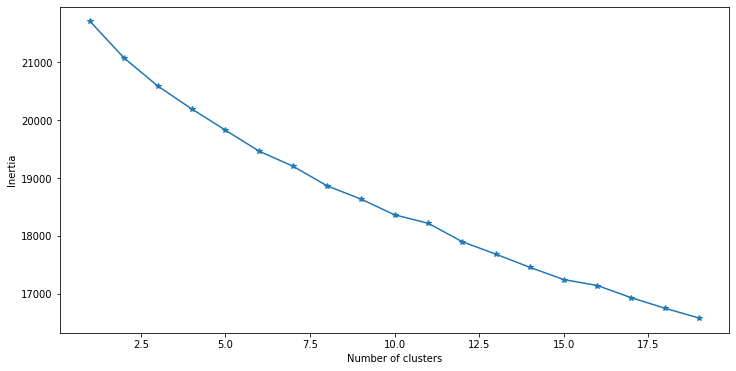

In [55]:
SSE = []
for i in range(1,20):
    kmeans = cluster.KMeans(n_clusters = i) # iterate from range (1, 20)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')